# Feature Selection by filter methods: numerical input, categorical output

https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [2]:
##  colorful prints
def black(text):
     print('\033[30m', text, '\033[0m', sep='')  
def red(text):
     print('\033[31m', text, '\033[0m', sep='')  
def green(text):
     print('\033[32m', text, '\033[0m', sep='')  
def yellow(text):
     print('\033[33m', text, '\033[0m', sep='')  
def blue(text):
     print('\033[34m', text, '\033[0m', sep='') 
def magenta(text):
     print('\033[35m', text, '\033[0m', sep='')  
def cyan(text):
     print('\033[36m', text, '\033[0m', sep='')  
def gray(text):
     print('\033[90m', text, '\033[0m', sep='')

In [3]:
df = pd.read_csv ('/home/wojciech/Pulpit/6/Breast_Cancer_Wisconsin.csv')
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


### Usuwanie niepotrzebnych kolumn

In [4]:
del df['id']
del df['Unnamed: 32']

### Koduje zmienną kategoryczną wynikową - diagnosis 	

In [5]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
df['diagnosis'] = pd.Categorical(df['diagnosis']).codes
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## Wybieranie funkcji na podstawie korelacji

In [7]:
corr = df.corr()


#### Szukam zmiennych, które są zbyt mocno skorelowane z innymi zmiennymi

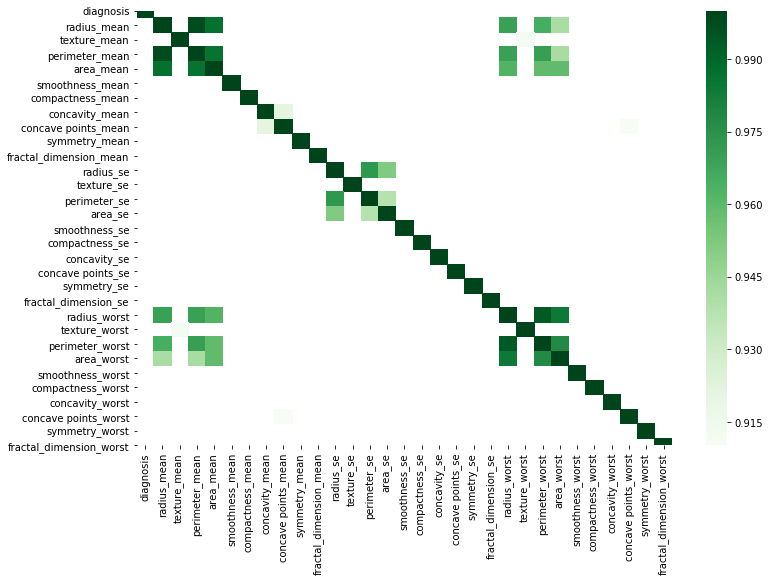

In [8]:
kot = corr[corr>=.9]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [9]:
print(green('Ilość zmiennych przed usunięciem zmiennych zbyt mocno skorelowanych: '),df.shape)

Ilość zmiennych przed usunięciem zmiennych zbyt mocno skorelowanych: 
None (569, 31)


## Usuwanie skorelowanych ze sobą zmiennych niezależnych - W PIERWSZEJ KOLUMNIE MUSI BYĆ ZMIENNA WYNIKOWA!
Kod porównujemy korelację między zmiennymi i usuwamy jedną z dwóch cech, których korelacja jest wyższa niż 0,9

In [10]:
KOT = np.full((corr.shape[0],), True, dtype=bool)

In [11]:

for i in range(corr.shape[1]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if KOT[j]:
                KOT[j] = False
selected_columns = df.columns[KOT]
df = df[selected_columns]

#### Algorytm wyeliminował 10 zmiennych

In [12]:
print(green('Ilość zmiennych po usunięciu zmiennych zbyt mocno skorelowanych: '),df.shape)

Ilość zmiennych po usunięciu zmiennych zbyt mocno skorelowanych: 
None (569, 21)


In [13]:
selected_columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Model regresji liniowej bez redukcji zmiennych

In [14]:
X = df.drop('diagnosis', axis=1) 
y = df['diagnosis']  

## Podział na dane treningowe i testowe

In [15]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123,stratify=y)

## Definicje

In [16]:
# Classification Assessment
def Classification_Assessment(model ,Xtrain, ytrain, Xtest, ytest, y_pred):
    import matplotlib.pyplot as plt
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
    from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

    print("Recall Training data:     ", np.round(recall_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("Precision Training data:  ", np.round(precision_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("----------------------------------------------------------------------")
    print("Recall Test data:         ", np.round(recall_score(ytest, model.predict(Xtest)), decimals=4)) 
    print("Precision Test data:      ", np.round(precision_score(ytest, model.predict(Xtest)), decimals=4))
    print("----------------------------------------------------------------------")
    print("Confusion Matrix Test data")
    print(confusion_matrix(ytest, model.predict(Xtest)))
    print("----------------------------------------------------------------------")
    print(classification_report(ytest, model.predict(Xtest)))
    
    y_pred_proba = model.predict_proba(Xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred)
    auc = metrics.roc_auc_score(ytest, y_pred)
    plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
    plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
    plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.legend(loc=4)
    plt.plot([0, 1], [0, 1],'r--')
    plt.show()
    print('auc',auc)

In [17]:
blue(X.shape)
green(X_train.shape)
green(X_test.shape)

(569, 20)
(455, 20)
(114, 20)


# Modelu klasyfikacji bez wyboru funkcji 

In [18]:
import numpy as np
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = -1, cv=2)

LR_Grid.fit(X_train, y_train) 
y_pred_LRC = LR_Grid.predict(X_test)

Recall Training data:      0.9588
Precision Training data:   0.9819
----------------------------------------------------------------------
Recall Test data:          0.9762
Precision Test data:       0.8913
----------------------------------------------------------------------
Confusion Matrix Test data
[[67  5]
 [ 1 41]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        72
           1       0.89      0.98      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



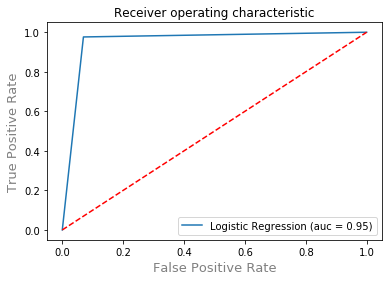

auc 0.9533730158730159


In [19]:
Classification_Assessment(LR_Grid ,X_train, y_train, X_test, y_test, y_pred_LRC)

# Redukcja zmiennych niezależnych za pomocą OLS

In [20]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
model_fit = model.fit()

blue(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     79.60
Date:                Fri, 27 Mar 2020   Prob (F-statistic):          1.54e-147
Time:                        17:59:18   Log-Likelihood:                -6.2938
No. Observations:                 569   AIC:                             54.59
Df Residuals:                     548   BIC:                             145.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

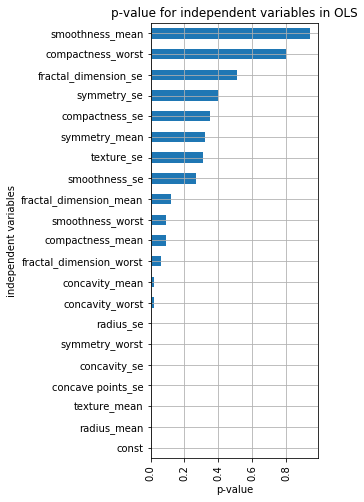

In [21]:
p_values = model_fit.summary2().tables[1]['P>|t|']
## zaokrąglam


p_values = np.round(p_values, decimals=2)
p_values= p_values.sort_values()

plt.figure(figsize=(3,8))
p_values.plot(kind='barh')
plt.title('p-value for independent variables in OLS')
plt.grid(True)
plt.ylabel('independent variables')
plt.xlabel('p-value')
plt.xticks(rotation=90)

# Wybieranie kolumn na podstawie wartości p

Usuwamy zmienną wynikową : 'diagnosis' ponieważ to jest kolumna wynikowa.
    

In [22]:
selected_columns[1:]

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [23]:
selected_columns = selected_columns[1:].values

# Model regresji liniowej - wybór zmiennych z p-value < 0.1

In [24]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [25]:

SL = 0.05
df_modeled, selected_columns = backwardElimination(df.iloc[:,1:].values, df.iloc[:,0].values, SL, selected_columns)

In [51]:
result = pd.DataFrame()
result['diagnosis'] = df.iloc[:,0]
result['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int8

In [27]:
df_reduced = pd.DataFrame(data = df_modeled, columns = selected_columns)
df_reduced.shape

(569, 13)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

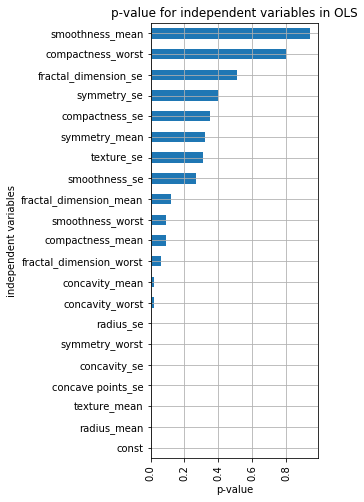

In [28]:
plt.figure(figsize=(3,8))
p_values.plot(kind='barh')
plt.title('p-value for independent variables in OLS')

plt.ylabel('independent variables')
plt.xlabel('p-value')
plt.grid(True)
plt.xticks(rotation=90)

In [29]:
df_reduced

,radius_mean,texture_mean,concavity_mean,fractal_dimension_mean,radius_se,compactness_se,concavity_se,concave points_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.30010,0.07871,1.0950,0.04904,0.05373,0.01587,0.006193,0.16220,0.7119,0.4601,0.11890
1,20.57,17.77,0.08690,0.05667,0.5435,0.01308,0.01860,0.01340,0.003532,0.12380,0.2416,0.2750,0.08902
2,19.69,21.25,0.19740,0.05999,0.7456,0.04006,0.03832,0.02058,0.004571,0.14440,0.4504,0.3613,0.08758
3,11.42,20.38,0.24140,0.09744,0.4956,0.07458,0.05661,0.01867,0.009208,0.20980,0.6869,0.6638,0.17300
4,20.29,14.34,0.19800,0.05883,0.7572,0.02461,0.05688,0.01885,0.005115,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.24390,0.05623,1.1760,0.02891,0.05198,0.02454,0.004239,0.14100,0.4107,0.2060,0.07115
565,20.13,28.25,0.14400,0.05533,0.7655,0.02423,0.03950,0.01678,0.002498,0.11660,0.3215,0.2572,0.06637
566,16.60,28.08,0.09251,0.05648,0.4564,0.03731,0.04730,0.01557,0.003892,0.11390,0.3403,0.2218,0.07820
567,20.60,29.33,0.35140,0.07016,0.7260,0.06158,0.07117,0.01664,0.006185,0.16500,0.9387,0.4087,0.12400


In [40]:
df_reduced.columns

Index(['radius_mean', 'texture_mean', 'concavity_mean',
       'fractal_dimension_mean', 'radius_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'fractal_dimension_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [42]:
df_reduced.head(8)

,radius_mean,texture_mean,concavity_mean,fractal_dimension_mean,radius_se,compactness_se,concavity_se,concave points_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.30010,0.07871,1.0950,0.04904,0.05373,0.01587,0.006193,0.1622,0.7119,0.4601,0.11890
1,20.57,17.77,0.08690,0.05667,0.5435,0.01308,0.01860,0.01340,0.003532,0.1238,0.2416,0.2750,0.08902
2,19.69,21.25,0.19740,0.05999,0.7456,0.04006,0.03832,0.02058,0.004571,0.1444,0.4504,0.3613,0.08758
3,11.42,20.38,0.24140,0.09744,0.4956,0.07458,0.05661,0.01867,0.009208,0.2098,0.6869,0.6638,0.17300
4,20.29,14.34,0.19800,0.05883,0.7572,0.02461,0.05688,0.01885,0.005115,0.1374,0.4000,0.2364,0.07678
5,12.45,15.70,0.15780,0.07613,0.3345,0.03345,0.03672,0.01137,0.005082,0.1791,0.5355,0.3985,0.12440
6,18.25,19.98,0.11270,0.05742,0.4467,0.01382,0.02254,0.01039,0.002179,0.1442,0.3784,0.3063,0.08368
7,13.71,20.83,0.09366,0.07451,0.5835,0.03029,0.02488,0.01448,0.005412,0.1654,0.2678,0.3196,0.11510


In [50]:
result['diagnosis']==0

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568     True
Name: diagnosis, Length: 569, dtype: bool

In [52]:
result

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


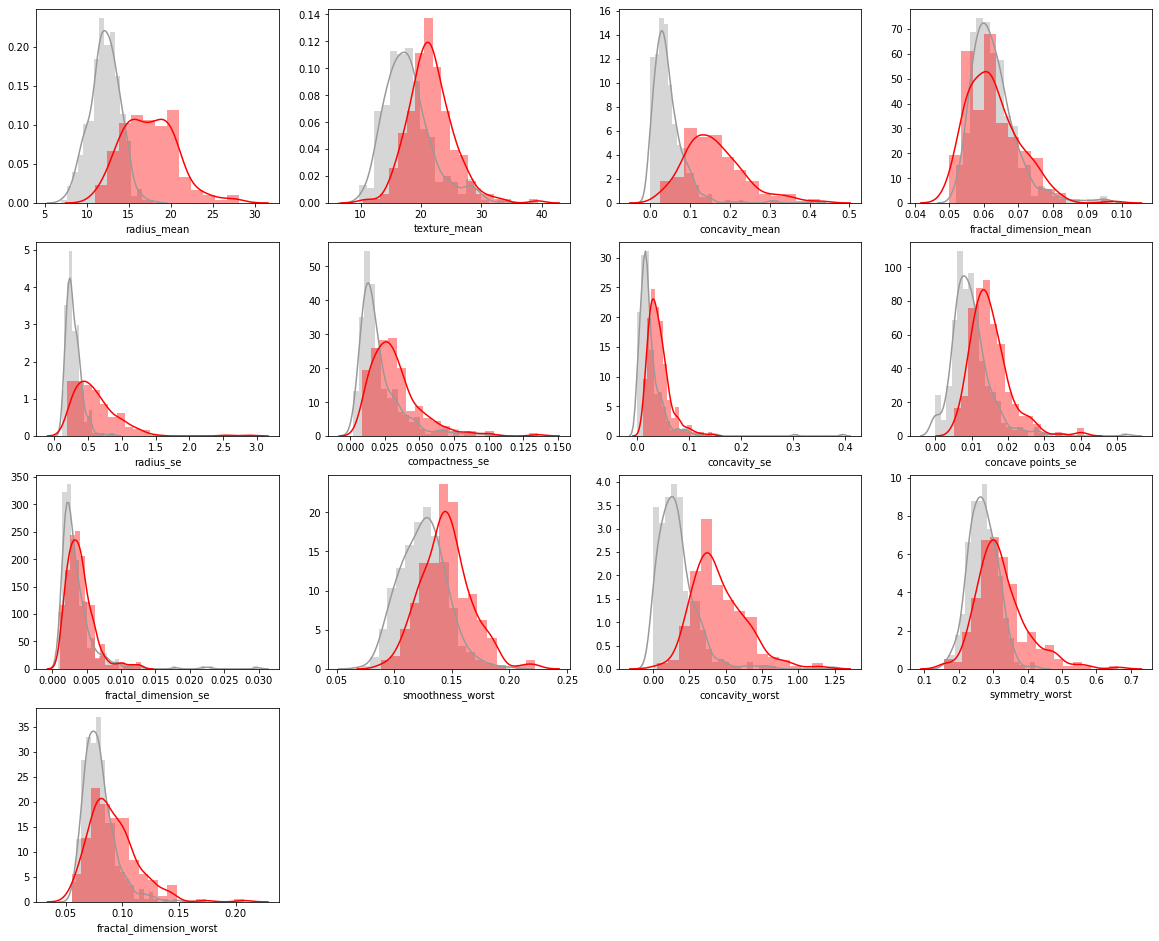

In [43]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in df_reduced.columns:
    plt.subplot(6, 4, j+1)
    j =j + 1
    sns.distplot(df_reduced[i][result['diagnosis']==0], color='#999999', label = 'benign')
    sns.distplot(df_reduced[i][result['diagnosis']==1], color='#ff0000', label = 'malignant')
#    plt.legend(loc='best',fontsize=10)
#fig.suptitle('Breast Cance Data Analysis',fontsize=34,color='#ff0000',alpha=0.3)
#fig.tight_layout()
#fig.subplots_adjust(top=0.95)
#plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x1800 with 0 Axes>

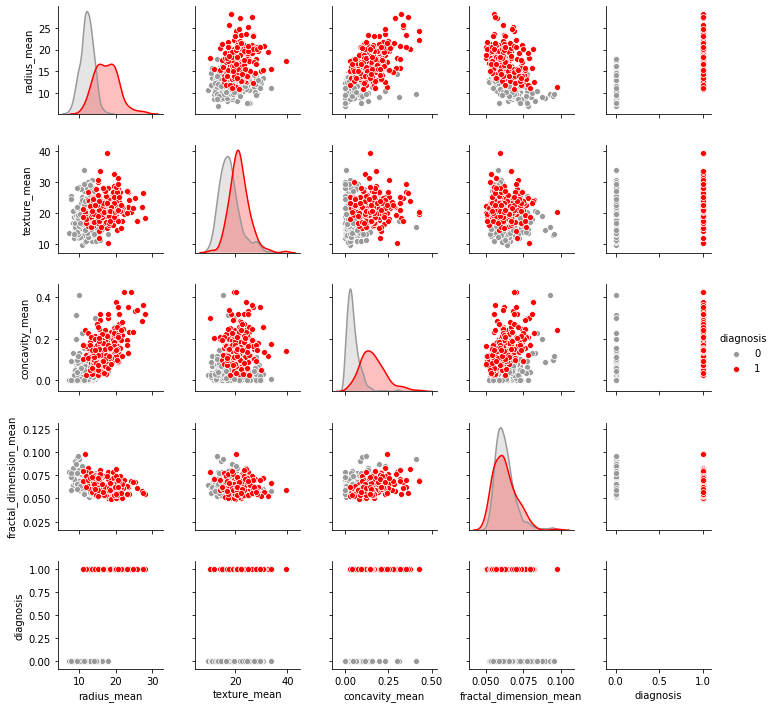

In [31]:
fig = plt.figure(figsize = (20, 25))
kot = ['#999999','#ff0000']
sns.pairplot(data=df[['radius_mean', 'texture_mean', 'concavity_mean',
       'fractal_dimension_mean','diagnosis']], hue='diagnosis', dropna=True, height=2, palette=kot)
plt.show

# Model ze zredukowanymi wymiarami

In [32]:
blue(df_reduced.columns)


Index(['radius_mean', 'texture_mean', 'concavity_mean',
       'fractal_dimension_mean', 'radius_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'fractal_dimension_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Dodaje zmienną wynikową i tworzę ręcznie zbiór zredukowany 

In [33]:
df2= df[['radius_mean', 'texture_mean', 'concavity_mean',
       'fractal_dimension_mean', 'radius_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'fractal_dimension_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst','diagnosis']]

In [34]:
X = df2.drop('diagnosis', axis=1) 
y = df2['diagnosis']  

In [35]:
from sklearn.model_selection import train_test_split 

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20, random_state=123,stratify=y)

In [36]:
blue(X.shape)
green(X_train2.shape)
green(X_test2.shape)

(569, 13)
(455, 13)
(114, 13)


In [37]:
import numpy as np
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid2 = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = -1, cv=2)

LR_Grid2.fit(X_train2, y_train2) 
y_pred_LRC2 = LR_Grid2.predict(X_test2)

Recall Training data:      0.9529
Precision Training data:   0.9759
----------------------------------------------------------------------
Recall Test data:          0.9762
Precision Test data:       0.8913
----------------------------------------------------------------------
Confusion Matrix Test data
[[67  5]
 [ 1 41]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        72
           1       0.89      0.98      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



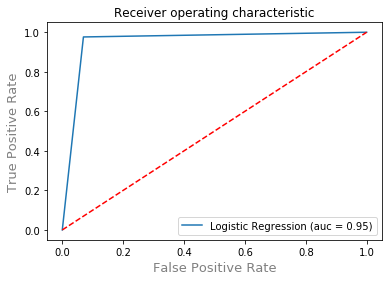

auc 0.9533730158730159


In [38]:
Classification_Assessment(LR_Grid2 ,X_train2, y_train2, X_test2, y_test2, y_pred_LRC2)